 **Abstract**

This dataset is valuable for analyses like trend spotting in movie genres, understanding the relationship between movie budgets and box office success, evaluating the influence of actors on movie ratings, and assessing the critical reception of movies across different regions and years.


Q) What are the data types? (Only numeric and categorical)

Ans – there are two types of data which are Numeric data in 6 columns and Categorical data in 9 columns. Which are
Title: The title of the movie.
title year: The year the movie was released.
budget: The budget of the movie.
Gross: Gross earnings of the movie.
actor_1_name, actor_2_name, actor_3_name: Names of the top three actors in the movie.
IMDb_rating: The IMDb rating of the movie.
genre_1, genre_2, genre_3: The genres associated with the movie.
Metacritic: The Metacritic score of the movie.
Runtime: The runtime of the movie in minutes.
content rating: The content rating of the movie (e.g., PG-13, R).
Country: The country where the movie was produced.
There are total 101number of observations.


In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
import pandas as pd
# Load the CSV file
data = pd.read_csv('Movieratings.csv',encoding='ISO-8859-1',sep=',')
print(data.to_string())

# print(data.dtypes)

                                              Title  title_year     budget      Gross              actor_1_name         actor_2_name            actor_3_name  IMDb_rating    genre_1    genre_2    genre_3  MetaCritic  Runtime content_rating    Country
0                                        La La Land        2016   30000000  151101803              Ryan Gosling           Emma Stone               Amie Conn          8.2     Comedy      Drama      Music          93      128          PG-13        USA
1                                          Zootopia        2016  150000000  341268248          Ginnifer Goodwin        Jason Bateman              Idris Elba          8.1  Animation  Adventure     Comedy          78      108             PG        USA
2                                              Lion        2016   12000000   51738905                 Dev Patel        Nicole Kidman             Rooney Mara          8.1  Biography      Drama   Suspense          69      118          PG-13  Australia


Q) Are there missing values?


Ans – There are no missing values in both Numerical columns and Categorical columns.


In [2]:
# Checking for missing values in the dataset
missing_values = data.isnull().sum()
missing_values_summary = missing_values[missing_values > 0]
print(missing_values_summary)

Series([], dtype: int64)


Q) What are the likely distributions of the numeric variables?

Ans- There are 6numercial variables which are title year, budget, Gross, Imbd_rating, Meta_Critic, Runtime. The likely distributions of these variables is as follows.


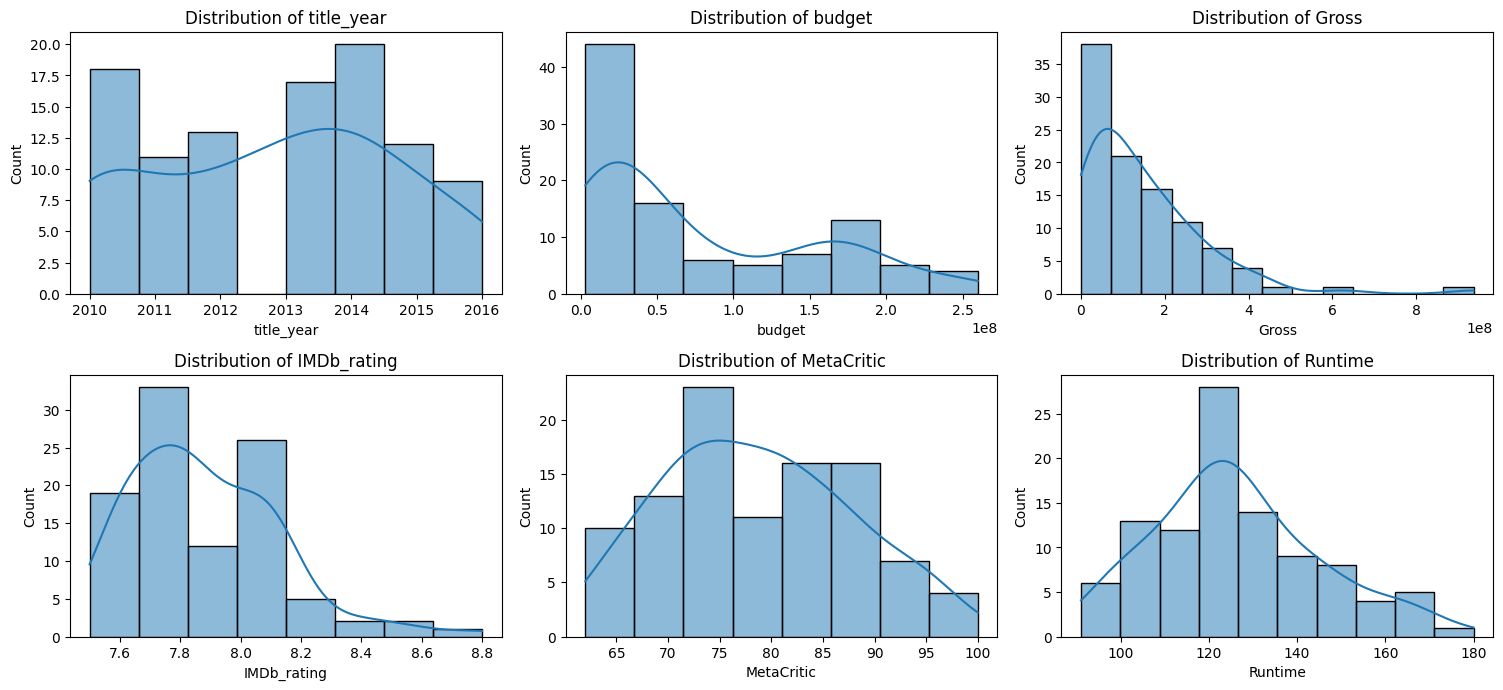

In [6]:
# Plotting distributions of the numeric variables
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
 plt.subplot(3, 3, i)
 sns.histplot(data[column], kde=True)
 plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

Q) Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

Ans-
1)  In our first method we used Correlation Analysis (for Linear Relationships) and took          ‘IMDb_rating’ as our Target variable  results are mentioned below.


In [8]:
#------------method 1 ---------------------
# for Correlation Analysis
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
target_correlations = correlation_matrix['IMDb_rating'].sort_values(ascending=False)
print(target_correlations)

IMDb_rating    1.000000
Gross          0.270453
Runtime        0.259959
budget         0.225800
title_year     0.140239
MetaCritic     0.096035
Name: IMDb_rating, dtype: float64


2) In second approach we used Random Forest Feature Importance method in order to indicate how much 'budget' contributes to predicting 'Gross' earnings, which in our case is 1.0.

In [9]:
#--Method 2---------------
#Random Forest Feature Importance
from sklearn.ensemble import RandomForestRegressor
X = data[['budget']]  # Independent variable: 'budget'
y = data['Gross']     # Dependent variable: 'Gross'
rf = RandomForestRegressor()
rf.fit(X, y)
importance = rf.feature_importances_
print("Feature importance for 'budget':", importance[0])

Feature importance for 'budget': 1.0


3) In third approach we used Recursive Feature Elimination (RFE) method in this method, when taken more than one independent variable to predict the target variable it gives the ranking and support of the given independent variables. In ranking order wise in our case in order to predict Runtime title year is more influential than imbd rating, which can be seen in ranking wise lowest to highest in the code.

In [10]:
#-------method 3------------------------
#using Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
X = data[['IMDb_rating','title_year']]  #these are independent variables
y = data['Runtime']     #this is target variable(dependent variable)
model = LinearRegression()
rfe = RFE(model, n_features_to_select=1)
rfe.fit(X, y)
ranking = rfe.ranking_
support = rfe.support_
print("Feature Ranking:", ranking)
print("Feature Support:", support)

Feature Ranking: [1 2]
Feature Support: [ True False]


Q)  Which independent variables have missing data? How much?

Ans- There is no missing data or Zeros for any Independent variable.


Q) Do the training and test sets have the same data?

Ans- No the training and test sets don’t have any overlapping rows which means they don’t have same data.

In [ ]:
# spliting the data
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)  # 70% training and 30% test
train_set = set([tuple(line) for line in train_data.values])
test_set = set([tuple(line) for line in test_data.values])
overlap = train_set.intersection(test_set)
print("Number of overlapping rows:", len(overlap))

Q) In the predictor variables independent of all the other predictor variables?

Ans- If the Variables are corelated to eachother then they are known as Multicollinearity variables as we can see the numerical variables in our dataset have Vif values very equal and not above 5 so they are not corelated to eachother and independent .

In [12]:
#Caluclating predictor varaible value
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
predictors = data.select_dtypes(include=['int64', 'float64']).drop(columns=['Gross'])
predictors = add_constant(predictors)

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["feature"] = predictors.columns
vif_data["VIF"] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]
print(vif_data)

       feature           VIF
0        const  1.157991e+06
1   title_year  1.051760e+00
2       budget  1.227218e+00
3  IMDb_rating  1.148712e+00
4   MetaCritic  1.152403e+00
5      Runtime  1.221193e+00


Q) Which predictor variables are the most important?

Ans- By using Random forest regressor method to predict target vaiable which is ‘Gross’ in our case  the important variable in order  are-

1) Budget

2) MetaCritic     

3) Runtime        

4) IMDb_

5) Title_year.

In [14]:
#predictor variable importance
from sklearn.ensemble import RandomForestRegressor
numeric_data = data.select_dtypes(include=['int64', 'float64'])
X = numeric_data.drop(columns=['Gross'])   #taking gross as prediction variable
y = numeric_data['Gross']

# Initialize the Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(X, y)
importances = rf.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame(importances, index=feature_names, columns=["importance"]).sort_values("importance", ascending=False)
print(feature_importances)

             importance
budget         0.731570
IMDb_rating    0.080553
Runtime        0.066877
MetaCritic     0.064836
title_year     0.056164


Q) Do the ranges of the predictor variables make sense?

Ans-
title_year: Ranges from 2010 to 2016, which seems reasonable. The standard deviation is small, indicating the years are closely clustered.

budget: Varies from 3 million to 260 million, which is a typical range for movie budgets. The large standard deviation suggests a wide variation in movie budgets.

IMDb_rating: Ranges from 62 to 100. This seems unusual since IMDb ratings are typically on a scale of 1 to 10. It might indicate a data error or a different rating scale being used which makes this not reasonable.

MetaCritic: Ranges from 62 to 100, which makes sense as MetaCritic scores are on a scale of 0 to 100.

Runtime: Varies from 91 to 180 minutes, which is a reasonable range for movie runtimes.

Gross Ranges from $3  million to $260  million. This wide range encompasses everything from modestly budgeted films to big-budget blockbusters.which shows significant variations makes it reasonable based on other variables.


In [15]:
# Generate descriptive statistics
numeric_data = data.select_dtypes(include=['int64', 'float64'])
descriptive_stats = numeric_data.describe()
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.max_rows', None)     # Display all rows, if needed
print(descriptive_stats)

        title_year        budget         Gross  IMDb_rating  MetaCritic  \
count   100.000000  1.000000e+02  1.000000e+02   100.000000   100.00000   
mean   2012.820000  7.838400e+07  1.468679e+08     7.883000    78.64000   
std       1.919491  7.445295e+07  1.454004e+08     0.247433     9.04927   
min    2010.000000  3.000000e+06  2.238380e+05     7.500000    62.00000   
25%    2011.000000  1.575000e+07  4.199752e+07     7.700000    72.00000   
50%    2013.000000  4.225000e+07  1.070266e+08     7.800000    78.00000   
75%    2014.000000  1.500000e+08  2.107548e+08     8.100000    86.00000   
max    2016.000000  2.600000e+08  9.366622e+08     8.800000   100.00000   

          Runtime  
count  100.000000  
mean   126.420000  
std     19.050799  
min     91.000000  
25%    114.750000  
50%    124.000000  
75%    136.250000  
max    180.000000  


Q) What are the distributions of the predictor variables?   

Ans- As we considered Target Variable as Gross column the rest of the independent variables which are predictor variables distributions are mentioned below


In [ ]:
# Distribution of predicted variables

predictor_variables = ['title_year', 'budget', 'IMDb_rating', 'MetaCritic', 'Runtime']
# Plotting histograms
plt.figure(figsize=(15, 10))
for i, var in enumerate(predictor_variables):
    plt.subplot(len(predictor_variables), 1, i+1)
    sns.histplot(data[var], kde=True)
    plt.title(f'Distribution of {var}')
plt.tight_layout()
plt.show()

Q) Remove outliers and keep outliers (does it have an effect of the final predictive model)?

Ans- IN order to compare them we created a temporary data set without outliers.Then Compared it with normal dataset with outliers and processed mean squared errors to check the difference between two models, We can see the change in values in two models in the output screen.

In [18]:
# removing an keeping outliers
#creating 2nd data file without outliers to compare
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered
data2  = pd.read_csv('Movieratings.csv',encoding='ISO-8859-1',sep=',')
data_without_outliers = remove_outliers(data2.select_dtypes(include=['int64', 'float64']), 'budget')



#now compare the 2nd data file inorder to
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
data_with_outliers = data.select_dtypes(include=['int64', 'float64'])
data_without_outliers = remove_outliers(data2.select_dtypes(include=['int64', 'float64']), 'budget')  # Implement your outlier removal here

# Split both datasets into train and test sets
X_train_with, X_test_with, y_train_with, y_test_with = train_test_split(
    data_with_outliers.drop('Gross', axis=1),
    data_with_outliers['Gross'],
    test_size=0.2)

X_train_without, X_test_without, y_train_without, y_test_without = train_test_split(
    data_without_outliers.drop('Gross', axis=1),
    data_without_outliers['Gross'],
    test_size=0.2
)
# Initialize and train the models
model_with = LinearRegression().fit(X_train_with, y_train_with)
model_without = LinearRegression().fit(X_train_without, y_train_without)
# Make predictions and evaluate both models
predictions_with = model_with.predict(X_test_with)
predictions_without = model_without.predict(X_test_without)

print("Model with Outliers: ", mean_squared_error(y_test_with, predictions_with))
print("Model without Outliers: ", mean_squared_error(y_test_without, predictions_without))

Model with Outliers:  2.3513978531306636e+16
Model without Outliers:  8922791359201619.0


Q) Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

Ans-To Check the randomly imputed values we used title year column and performed changes on it accordingly.Then we randomly removed data by 1,5,10 percentage and applied imputations mean, median, Knn (k nearest neighbour) and evaluated it with
mean squared error- which reviews squared difference between original value and imputed value, values closer to zero means they are similar to the original values.
bias - It reviews the difference between average imputed value and original value, bias close to zero means they are similar to the imputed values.
Variance – It reviews how much values are spread out from there mean. Higher variance means imputed values are widely different from original values.

As shown in the code



In [ ]:
# changing or imputing values 1%,5%,10%

import numpy as np
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import mean_squared_error

def random_removal(data, column, percentage):
    data_copy = data.copy()
    random_indices = np.random.choice(data_copy.index, int(len(data_copy) * percentage), replace=False)
    data_copy.loc[random_indices, column] = np.nan
    return data_copy

def evaluate_imputation(original_data, imputed_data, column):
    mse = mean_squared_error(original_data[column], imputed_data[column])
    bias = np.mean(original_data[column]) - np.mean(imputed_data[column])
    variance = np.var(imputed_data[column] - original_data[column])
    return mse, bias, variance

# Choose a column for imputation analysis
column_name = 'title_year'

# Randomly remove data
for percentage in [0.01, 0.05, 0.10]:
    data_removed = random_removal(data, column_name, percentage)

    # Mean imputation
    mean_imputer = SimpleImputer(strategy='mean')
    data_mean_imputed = data_removed.copy()
    data_mean_imputed[column_name] = mean_imputer.fit_transform(data_removed[[column_name]])

    # Median imputation
    median_imputer = SimpleImputer(strategy='median')
    data_median_imputed = data_removed.copy()
    data_median_imputed[column_name] = median_imputer.fit_transform(data_removed[[column_name]])

    # KNN imputation
    knn_imputer = KNNImputer(n_neighbors=5)
    data_knn_imputed = data_removed.copy()
    data_knn_imputed[column_name] = knn_imputer.fit_transform(data_removed[[column_name]])

    # Evaluate imputation methods
    for method, imputed_data in [('Mean', data_mean_imputed), ('Median', data_median_imputed), ('KNN', data_knn_imputed)]:
        mse, bias, variance = evaluate_imputation(data, imputed_data, column_name)
        print(f"Method: {method}, Percentage: {percentage*100}%, MSE: {mse}, Bias: {bias}, Variance: {variance}")

For categorical data, calculate the accuracy and a confusion matrix.

Ans- Confusion matrix formed on 'Content_rating' target column

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Load the dataset
file_path = 'Movieratings.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1')

# List of categorical columns (excluding the target column)
categorical_columns = ['Title','actor_1_name', 'actor_2_name', 'actor_3_name', 'genre_1', 'genre_2', 'genre_3' , 'Country']

# One-hot encoding for categorical feature columns
data = pd.get_dummies(data, columns=categorical_columns)

# Assuming the target column is non-numeric and categorical
target_column = 'content_rating'  #target variable
label_encoder = LabelEncoder()
data[target_column] = label_encoder.fit_transform(data[target_column])

# Split the data
X = data.drop(columns=[target_column])
y = data[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a classifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Make predictions
predictions = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.5333333333333333
Confusion Matrix:
[[0 1 0 0]
 [0 3 2 0]
 [0 0 8 2]
 [0 0 9 5]]


References

---


Kaggle.com

Chatgpt